# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files. It calculates monthly anomalies and then plots a time series of results from 1850-2015. 


In [2]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [3]:
# import custom functions
import anomaly_function as func # imports the function
import model_figures as func2

In [4]:
# use this to reload the function file if I make any edits to it
func = reload(func) 
func2 = reload(func2)

In [5]:
!ls /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5

v20200302


In [6]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


## Read in model data

In [7]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

46 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [8]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [9]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [10]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.35 GB,228.10 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,333 Tasks,41 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.70 GB,456.19 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,382 Tasks,41 Chunks
Type,float64,numpy.ndarray


In [11]:
# sort models alphabetically and prints final model list
models = models.sortby('model')
print(models.model.data)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CESM2' 'CESM2-FV2'
 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM' 'CMCC-CM2-SR5' 'CanESM5'
 'E3SM-1-1' 'E3SM-1-1-ECA' 'EC-Earth3' 'EC-Earth3-Veg-LR' 'FGOALS-f3-L'
 'FGOALS-g3' 'FIO-ESM-2-0' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-G-CC' 'GISS-E2-1-H' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM6A-LR'
 'KACE-1-0-G' 'MIROC6' 'MPI-ESM-1-2-HAM' 'MPI-ESM1-2-LR' 'MRI-ESM2-0'
 'NESM3' 'NorCPM1' 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1']


In [12]:
# # get rid of new model
# models = models.drop_sel(model=['TaiESM1'])

## Select out regions
Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [13]:
# area weighting 
models_w = models*np.cos(models_tas.lat*(np.pi/180))

In [14]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

## Anomalies

In [16]:
# use functions to calculate the monthly anomalies for the globe
monthly_anom_glob = func.monthly_anomaly(models_w, '1850-01', '1881-01')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [17]:
# Select out SH and NH anomalies 
monthly_anom_SH = monthly_anom_glob.sel(lat=slice(-90,0)) 
monthly_anom_NH = monthly_anom_glob.sel(lat=slice(0,90)) 

In [18]:
# select out the Australian and E Australian anomalies 
monthly_anom_Aus = monthly_anom_glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.data==1, drop=True)
monthly_anom_EA = monthly_anom_glob.sel(lat=slice(-50,-10), lon=slice(140,155)).where(landmask.data==1, drop=True)

## Multi-model mean

In [19]:
# Take the multimodel mean for each region
mmm_mon_Glob = monthly_anom_glob.mean(dim='model')
mmm_mon_SH = monthly_anom_SH.mean(dim='model')
mmm_mon_NH = monthly_anom_NH.mean(dim='model')
mmm_mon_Aus = monthly_anom_Aus.mean(dim='model')
mmm_mon_EA = monthly_anom_EA.mean(dim='model')


## Percentiles 

In [20]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p10_mon_Glob = monthly_anom_glob.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_SH = monthly_anom_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_NH = monthly_anom_NH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_Aus = monthly_anom_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_EA = monthly_anom_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

In [21]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p90_mon_Glob = monthly_anom_glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_SH = monthly_anom_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_NH = monthly_anom_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_Aus = monthly_anom_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_EA = monthly_anom_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])

## Take the lat and lon mean  (llm) before plotting

In [22]:
# take the lat lon mean for mmm datsets for each region
mmm_llm_Glob = mmm_mon_Glob.mean(dim=['lat','lon'])
mmm_llm_SH = mmm_mon_SH.mean(dim=['lat','lon'])
mmm_llm_NH = mmm_mon_NH.mean(dim=['lat','lon'])
mmm_llm_Aus = mmm_mon_Aus.mean(dim=['lat','lon'])
mmm_llm_EA = mmm_mon_EA.mean(dim=['lat','lon'])

In [23]:
# take the lat lon mean for 10th percentile for each region
p10_llm_Glob = p10_mon_Glob.mean(dim=['lat','lon'])
p10_llm_SH = p10_mon_SH.mean(dim=['lat','lon'])
p10_llm_NH = p10_mon_NH.mean(dim=['lat','lon'])
p10_llm_Aus = p10_mon_Aus.mean(dim=['lat','lon'])
p10_llm_EA = p10_mon_EA.mean(dim=['lat','lon'])

In [24]:
# take the lat lon mean for 90th percentile for each region
p90_llm_Glob = p90_mon_Glob.mean(dim=['lat','lon'])
p90_llm_SH = p90_mon_SH.mean(dim=['lat','lon'])
p90_llm_NH = p90_mon_NH.mean(dim=['lat','lon'])
p90_llm_Aus = p90_mon_Aus.mean(dim=['lat','lon'])
p90_llm_EA = p90_mon_EA.mean(dim=['lat','lon'])

## Figures

In [25]:
func2 = reload(func2)

In [26]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [ ]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,12)) # make a figure

func2.timeseries_graph(mmm_llm_Glob.tas, p10_llm_Glob.tas, p90_llm_Glob.tas, ax = axes[0], color='lightcoral')
func2.timeseries_graph(mmm_llm_SH.tas, p10_llm_SH.tas, p90_llm_SH.tas, ax = axes[1], color='lightcoral')
func2.timeseries_graph(mmm_llm_Aus.tas, p10_llm_Aus.tas, p90_llm_Aus.tas, ax = axes[2], color='lightcoral')
func2.timeseries_graph(mmm_llm_EA.tas, p10_llm_EA.tas, p90_llm_EA.tas, ax = axes[3], color='lightcoral')

#axes[0].axvline(x=e_dates[0], color = 'k', linestyle = '--', alpha = 0.9, linewidth='0.8')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('timeseries_mon_tas_stacked.png', dpi=300, bbox_inches='tight')

In [ ]:
# same plot but stacked rather than 2x2
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

func2.timeseries_graph(mmm_llm_Glob.pr, p10_llm_Glob.pr, p90_llm_Glob.pr, ax = axes[0], color='lightblue')
func2.timeseries_graph(mmm_llm_SH.pr, p10_llm_SH.pr, p90_llm_SH.pr, ax = axes[1], color='lightblue')
func2.timeseries_graph(mmm_llm_Aus.pr, p10_llm_Aus.pr, p90_llm_Aus.pr, ax = axes[2], color='lightblue')
func2.timeseries_graph(mmm_llm_EA.pr, p10_llm_EA.pr, p90_llm_EA.pr, ax = axes[3], color='lightblue')

# set axis labels and subplot titles
axes[0].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Southern Hemisphere')
axes[2].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Australia')
axes[3].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Eastern Australia')

fig.suptitle('Time series of precipitation anomalies', size=16)

#fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('timeseries_mon_pr_stacked.png', dpi=300, bbox_inches='tight')


In [ ]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']
e_post10yrs = ['1893-08','1912-10', '1973-03', '1992-04', '2001-06']

In [ ]:
# Zoom in on Krakatoa time period
K_mmm_Glob = mmm_llm_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_SH = mmm_llm_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus = mmm_llm_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_EA = mmm_llm_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p10_Glob = p10_llm_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_SH = p10_llm_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus = p10_llm_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_EA = p10_llm_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p90_Glob = p90_llm_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_SH = p90_llm_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus = p90_llm_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_EA = p90_llm_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

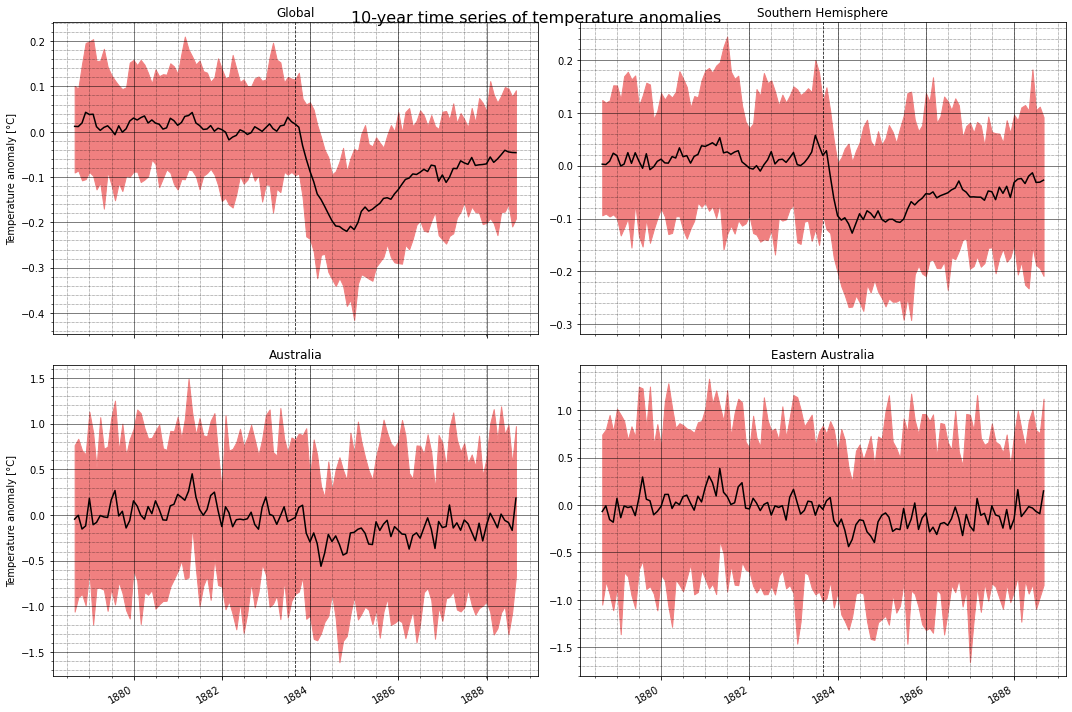

In [132]:
# Monthly temperature anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
func2.timeseries_graph(K_mmm_Glob.tas, K_p10_Glob.tas, K_p90_Glob.tas, ax = axes[0,0],color='lightcoral')
func2.timeseries_graph(K_mmm_SH.tas, K_p10_SH.tas, K_p90_SH.tas, ax = axes[0,1], color='lightcoral')
func2.timeseries_graph(K_mmm_Aus.tas, K_p10_Aus.tas, K_p90_Aus.tas, ax = axes[1,0], color='lightcoral')
func2.timeseries_graph(K_mmm_EA.tas, K_p10_EA.tas, K_p90_EA.tas, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

fig.suptitle('10-year time series of temperature anomalies', size=16)

#fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('K_timeseries_mon_tas.png', dpi=300, bbox_inches='tight')

## still trying to get the axis ticks for each month

In [1]:
# Monthly precipitation anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
func2.timeseries_graph(K_mmm_Glob.pr, K_p10_Glob.pr, K_p90_Glob.pr, ax = axes[0,0], color='lightblue')
func2.timeseries_graph(K_mmm_SH.pr, K_p10_SH.pr, K_p90_SH.pr, ax = axes[0,1], color='lightblue')
func2.timeseries_graph(K_mmm_Aus.pr, K_p10_Aus.pr, K_p90_Aus.pr, ax = axes[1,0], color='lightblue')
func2.timeseries_graph(K_mmm_EA.pr, K_p10_EA.pr, K_p90_EA.pr, ax = axes[1,1], color='lightblue')

# set axis labels and subplot titles
axes[0,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# set's the axis ticks 12 months apart
#axes[0,0].set_xticks((min(K_mmm_mon_Glob.time).data, max(K_mmm_mon_Glob.time).data), 3)

fig.suptitle('10-year time series of precipitation anomalies', size=16)

plt.savefig('K_timeseries_mon_pr.png', dpi=300, bbox_inches='tight')

NameError: name 'plt' is not defined

In [ ]:
print(min(K_mmm_mon_Glob.time.values))

## Seasonal anomaly calculations for figures


In [ ]:
# select the anomaly for each season

anom_djf = mean_seasonal.sel(season = 'DJF')
anom_mam = mean_seasonal.sel(season = 'MAM')
anom_jja = mean_seasonal.sel(season = 'JJA')
anom_son = mean_seasonal.sel(season = 'SON')

In [ ]:
mmm_djf = mmm_seasonal.sel(season = 'DJF')
mmm_mam = mmm_seasonal.sel(season = 'MAM')
mmm_jja = mmm_seasonal.sel(season = 'JJA')
mmm_son = mmm_seasonal.sel(season = 'SON')